## Workflow stages

1. Question or problem definition.
2. Acquire data.
3. Analyze by describing data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.

## Question or problem definition.

- to build an algorithm that automatically suggests the right product prices. 
- be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.

https://www.kaggle.com/c/mercari-price-suggestion-challenge/overview/description

In [16]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os

# text mining
import nltk
from nltk.corpus import stopwords

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

## Acquire data

In [17]:
train = pd.read_csv('C:/Users/skim/Desktop/kaggle/mercari/data/mercari-price-suggestion-challenge/train.tsv', sep='\t')
test = pd.read_csv('C:/Users/skim/Desktop/kaggle/mercari/data/mercari-price-suggestion-challenge/test.tsv', sep='\t')
combine = [train, test]

## Analyze by describing data

In [18]:
print(train.shape)
print(test.shape)
print(train.columns.values)

(1482535, 8)
(693359, 7)
['train_id' 'name' 'item_condition_id' 'category_name' 'brand_name'
 'price' 'shipping' 'item_description']


In [20]:
print(train.head())

   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet 

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


## Analyze by pivoting features

In [22]:
train[['name', 'price']].groupby(['name'], as_index=False).mean().sort_values(by='price', ascending=False)

,name,price
706440,NEW Chanel WOC Caviar Gold Hardware,2009.0
714071,NEW-Chanel Boy Wallet o Chain WOC Caviar,2006.0
316772,David Yurman Wheaton ring,2004.0
270634,Chanel Classic Jumbo Single flap bag,2000.0
270631,Chanel Chevron Fuschia Pink 2,2000.0
...,...,...
944563,Sea Turtle Charm Necklace,0.0
406710,Frozen Elsa Dress,0.0
779421,Nike Dri-Fit High Power Speed Tights,0.0
698318,Mossimo denium shorts,0.0


In [23]:
train[['item_condition_id', 'price']].groupby(['item_condition_id'], as_index=False).mean().sort_values(by='price', ascending=False)

,item_condition_id,price
4,5,31.703859
1,2,27.563225
2,3,26.540711
0,1,26.486967
3,4,24.349212


In [24]:
train[['category_name', 'price']].groupby(['category_name'], as_index=False).mean().sort_values(by='price', ascending=False)

,category_name,price
963,Vintage & Collectibles/Antique/Furniture,195.000000
153,Handmade/Bags and Purses/Clutch,180.222222
89,Electronics/Computers & Tablets/Laptops & Netb...,177.089176
681,Kids/Strollers/Standard,163.666667
87,Electronics/Computers & Tablets/Desktops & All...,149.329412
...,...,...
288,Handmade/Knitting/Doll,5.000000
215,Handmade/Dolls and Miniatures/Artist Bears,5.000000
590,Kids/Diapering/Washcloths & Towels,4.000000
280,Handmade/Jewelry/Clothing,4.000000


In [25]:
train[['brand_name', 'price']].groupby(['brand_name'], as_index=False).mean().sort_values(by='price', ascending=False)

,brand_name,price
1222,Demdaco,429.000000
3465,Proenza Schouler,413.250000
346,Auto Meter,344.000000
3187,Oris,300.000000
2656,MCM Worldwide,289.173913
...,...,...
3819,Scunci,3.000000
3381,Play MG,3.000000
2285,Kae Argatherapie,3.000000
1795,Gossip Girl,0.000000


In [38]:
global brand_uniq
brand_uniq = train.loc[train.brand_name.notnull(), ['brand_name']]
brand_uniq = brand_uniq['brand_name'].unique()
brand_uniq

array(['MLB', 'Razer', 'Target', ..., 'Astroglide', 'Cumberland Bay',
       'Kids Only'], dtype=object)

In [28]:
brand_null_index = train[train.brand_name.isnull()].index
brand_null_index

Int64Index([      0,       3,       4,       5,       9,      17,      23,
                 31,      34,      35,
            ...
            1482510, 1482511, 1482514, 1482518, 1482522, 1482526, 1482527,
            1482532, 1482533, 1482534],
           dtype='int64', length=632682)

In [39]:
def add_brandname1(name):
    global brand_uniq
    for i in brand_uniq:
        if i in name:
            return(i)
    return('')

def add_brandname2(train_df, brand_null_index):
    train = train_df
    train.loc[brand_null_index, 'brand_name'] = train.name[brand_null_index].apply(add_brandname1)
    return(train)

train = add_brandname2(train, brand_null_index)

In [40]:
train.brand_name

0                  MLB
1                Razer
2               Target
3                     
4                     
              ...     
1482530    Free People
1482531         Disney
1482532               
1482533               
1482534               
Name: brand_name, Length: 1482535, dtype: object

In [41]:
train[['shipping', 'price']].groupby(['shipping'], as_index=False).mean().sort_values(by='price', ascending=False)

,shipping,price
0,0,30.111778
1,1,22.567726


(array([1.472289e+06, 8.335000e+03, 1.169000e+03, 3.990000e+02,
        1.780000e+02, 6.500000e+01, 4.700000e+01, 2.100000e+01,
        1.600000e+01, 1.600000e+01]),
 array([   0. ,  200.9,  401.8,  602.7,  803.6, 1004.5, 1205.4, 1406.3,
        1607.2, 1808.1, 2009. ]),
 <a list of 10 Patch objects>)

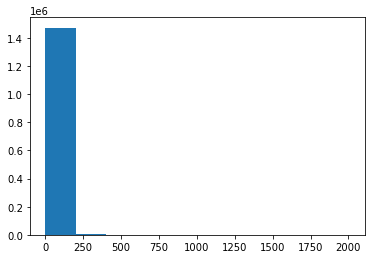

In [42]:
plt.hist(train.price)

## Reform some features

(array([8.74000e+02, 1.87030e+04, 1.93836e+05, 6.20246e+05, 4.46867e+05,
        1.53715e+05, 3.83370e+04, 8.41300e+03, 1.34000e+03, 2.04000e+02]),
 array([0.      , 0.760589, 1.521178, 2.281767, 3.042356, 3.802945,
        4.563534, 5.324123, 6.084712, 6.845301, 7.60589 ]),
 <a list of 10 Patch objects>)

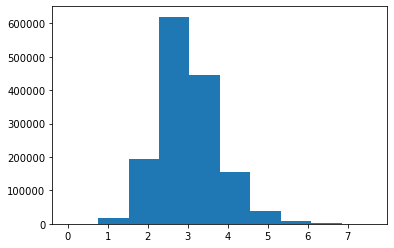

In [43]:
train['log_price'] = np.log1p(train['price'])
plt.hist(train.log_price)

In [44]:
train[['category_name', 'price']].groupby(['category_name'], as_index=False).mean().sort_values(by='price', ascending=False)

,category_name,price
963,Vintage & Collectibles/Antique/Furniture,195.000000
153,Handmade/Bags and Purses/Clutch,180.222222
89,Electronics/Computers & Tablets/Laptops & Netb...,177.089176
681,Kids/Strollers/Standard,163.666667
87,Electronics/Computers & Tablets/Desktops & All...,149.329412
...,...,...
288,Handmade/Knitting/Doll,5.000000
215,Handmade/Dolls and Miniatures/Artist Bears,5.000000
590,Kids/Diapering/Washcloths & Towels,4.000000
280,Handmade/Jewelry/Clothing,4.000000


## From Descriptions

In [45]:
from nltk.tokenize import word_tokenize
stop = stopwords.words('english')
train['item_description'] = train['item_description'].fillna("")


In [46]:
train['item_description'] = train['item_description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['item_description'].head()



0                                   no description yet
1    this keyboard is in great condition and works ...
2    adorable top with a hint of lace and a key hol...
3    new with tags. leather horses. retail for [rm]...
4            complete with certificate of authenticity
Name: item_description, dtype: object

In [ ]:
train['item_description'] = train['item_description'].str.replace('[^\w\s]','')
train['item_description'].head()


In [ ]:
train['item_description'] = train['item_description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['item_description'].head()

In [ ]:
word_uniq = pd.Series(' '.join(train['item_description']).split()).unique()

In [ ]:
word_uniq

## Finish Data Processing

## Model, predict and solve

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Random Forrest
- neural network

In [ ]:
X_train = train.drop('price', axis=1)
Y_train = train['price']
X_test  = test.drop('test_id', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

## Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
submission = pd.DataFrame({
        "test_id": test["test_id"],
        "price": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)